In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 왕좌의 게임 데이터 분석 (+ 시각화)

## 1. Matplotlib 소개
### - 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지
### - Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능 제공
#### * 라인 플롯(line plot)
#### * 스캐터 플롯(scatter plot)
#### * 컨투어 플롯(contour plot)
#### * 서피스 플롯(surface plot)
#### * 바 차트(bar chart)
#### * 히스토그램(histogram)
#### * 박스 플롯(box plot)

## [Matplotlib 갤러리 웹사이트]
http://matplotlib.org/gallery.html

In [2]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2015, 2016, 2017]
df

,경기,경상,서울,전라,충청
2015,1023,897,1053.5,451,512
2016,1067,872,1023.0,421,489
2017,1123,811,987.0,399,487


In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline 
#####바로 아웃풋에 바로 그림이 나오게 옵션 설정.

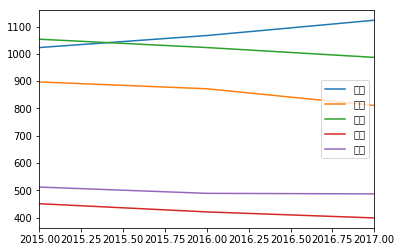

In [5]:
# 기본 그리기
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
df.plot()

In [6]:
matplotlib.rcParams['font.family']

['sans-serif']

In [7]:
#한글 깨짐 해결.
# matplotlib에 한글 폰트 추가.
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [8]:
matplotlib.rcParams['font.family']

['Malgun Gothic', 'sans-serif']

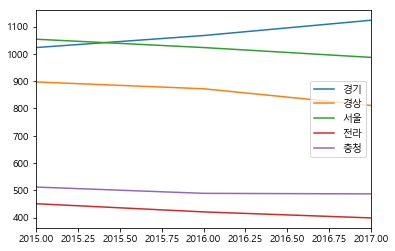

In [9]:
df.plot()

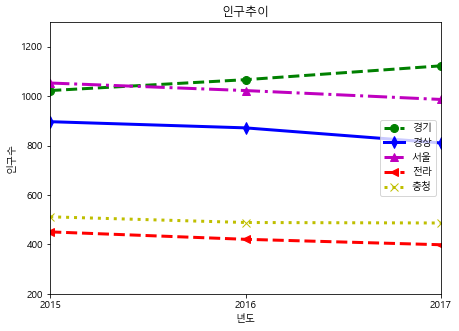

In [10]:
df.plot(
        kind = 'line',  #그래프의 모양. default는 line
        title = '인구추이',
        figsize = (7,5), #그래프의 크기를 지칭, 튜플구조로 써야함.
        xticks = df.index, # [2015, 2016, 2017] 해도 됨 / yticks도 가능.       
        ylim = [200, 1300], #y의 limit설정. xlim도 가능
        style = ['g--o','b-d','m-.^','r--<','y:x'], # ' ' 안에 순서는 상관없음.
        lw = 3,
        ms = 8
)
plt.xlabel('년도')
plt.ylabel('인구수')
plt.show()

<img src="img/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E613382B70>,
      dtype=object)

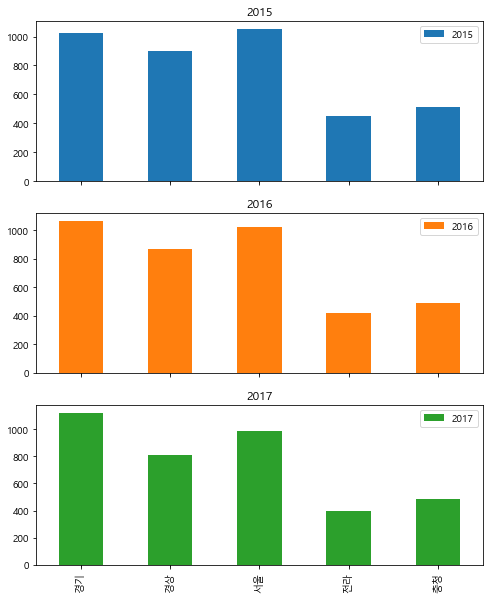

In [11]:
# 실습. 아래 그림처럼 연도별 지역별 인구수 그래프 그리기

df.T.plot(kind= ' bar', subplots = True, figsize= (8,10))

<img src="img/그림의구조.jpg" alt="그림의구조" style="width: 1200px;"/>

# matplotlib 기반 최신 시각화 라이브러리 소개
1. seaborn
  - matplotlib을 기반으로 만들어진 시각화 라이브러리
  - 디자인적으로 훨씬 세련됨.  
  - matplotlib와 사용방식이 유사하므로 쉽고 빠르게 습득할 수 있음.
  - https://seaborn.pydata.org/

2. bokeh
  - 웹브라우저 상에서의 시각화에 효과적인 파이썬 인터랙티브 시각화 라이브러리
  - 플롯을 html 파일로 export하여 이를 웹브라우저를 통해 확인할 수 있음.
  - matplotlib와 비슷, jupyter와 호환이 잘 됨. 
  - https://bokeh.pydata.org/en/latest/

3. Folium 
  - 지리적 데이터 시각화에 특화된 라이브러리 (leaflet.js 기반)
  - 웹브라우저에서 확인 가능
  - 지도 데이터 사용을 위해 선행되어야 하는 작업이 원래 매우 많은데, 이러한 선행작업을 간단화함.
  - https://github.com/python-visualization/folium
  - http://python-visualization.github.io/folium/docs-v0.5.0/
  - http://pinkwink.kr/971

## 2. 왕좌의 게임 데이터 분석 및 시각화 실습
### 1) 데이터 적재

In [12]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

In [13]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [14]:
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


### 2) 책의 챕터별로 사망자 수 추이 시각화

In [30]:
death_count_book_chapter= death.pivot_table(index = 'Book of Death',
                                             values = 'Name',
                                             aggfunc = 'count')
death_count_book_chapter

,Name
Book of Death,
1.0,49
2.0,73
3.0,97
4.0,27
5.0,61


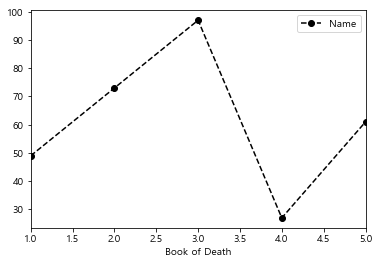

In [16]:
#death_count_book_chapter.plot(style = 'k--o')
graph1=death_count_book_chapter.plot(color = 'k', linestyle = '--', marker = 'o')

In [17]:
type(graph1)

matplotlib.axes._subplots.AxesSubplot

In [18]:
graph1.set_title('권별 사망자수')
graph1.set_xticks([1,2,3,4,5])
graph1.set_xlabel('book chapter')
graph1.set_ylabel('# of Death')

Text(3.2,0.5,'# of Death')

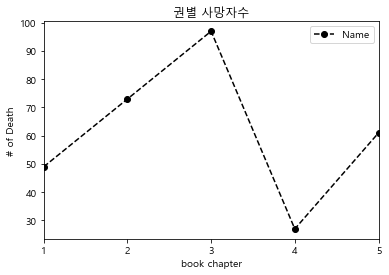

In [19]:
graph1.figure

In [20]:
graph1.figure.savefig('book_chapter.jpg')

### 3) 대규모 전쟁의  공격진영과 수비 진영의 숫자 시각화
#### 대규모 전쟁 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [21]:
#대규모 전쟁을 big_battles에 저장
big_battles = battles[battles.attacker_size + battles.defender_size >= 10000]

In [22]:
big_battles = big_battles[['name', 'attacker_size', 'defender_size']]

In [23]:
big_battles

,name,attacker_size,defender_size
0,Battle of the Golden Tooth,15000.0,4000.0
2,Battle of Riverrun,15000.0,10000.0
3,Battle of the Green Fork,18000.0,20000.0
5,Battle of the Camps,6000.0,12625.0
14,Battle of Oxcross,6000.0,10000.0
15,Siege of Storm's End,5000.0,20000.0
16,Battle of the Fords,20000.0,10000.0
19,Battle of the Blackwater,21000.0,7250.0
27,Battle of Castle Black,100000.0,1240.0
37,Siege of Winterfell,5000.0,8000.0


In [24]:
big_battles = big_battles.set_index('name')
big_battles

,attacker_size,defender_size
name,,
Battle of the Golden Tooth,15000.0,4000.0
Battle of Riverrun,15000.0,10000.0
Battle of the Green Fork,18000.0,20000.0
Battle of the Camps,6000.0,12625.0
Battle of Oxcross,6000.0,10000.0
Siege of Storm's End,5000.0,20000.0
Battle of the Fords,20000.0,10000.0
Battle of the Blackwater,21000.0,7250.0
Battle of Castle Black,100000.0,1240.0


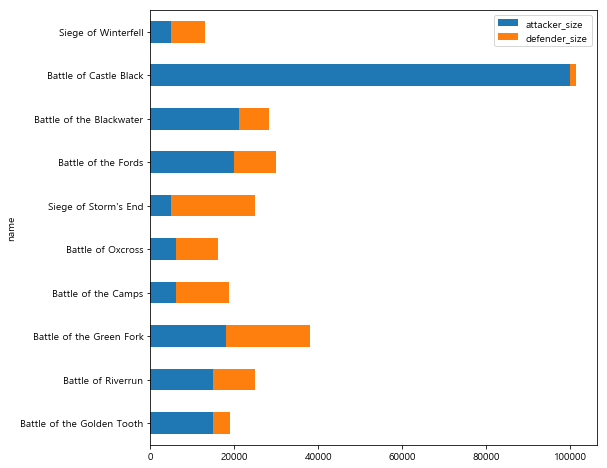

In [25]:
big_battles.plot(kind='barh', stacked = True, figsize=(8,8)) #Stacked는 두 개의 그래프를 합치는거!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E613694080>,
      dtype=object)

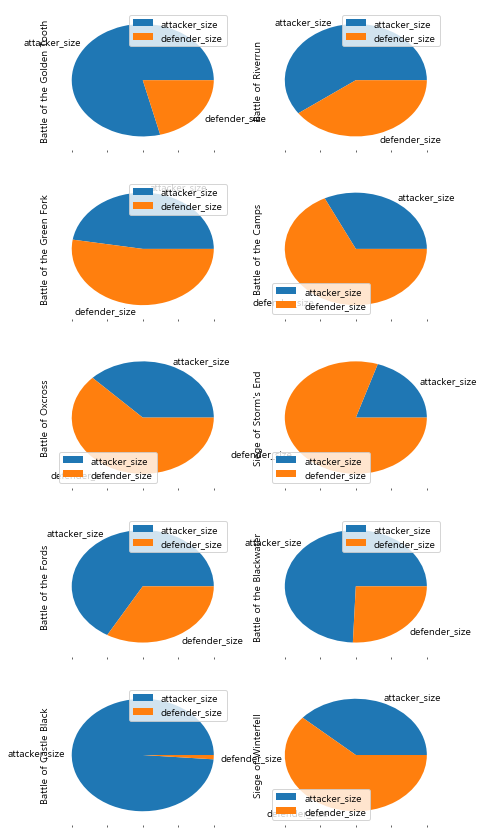

In [26]:
big_battles.T.plot(kind='pie', subplots = True, layout=(5,2),figsize=(7,15)) #pie그래프의 특징을 생각할것

### 4) (실습) 가문 별로 전쟁을 벌인 횟수 시각화

In [58]:
battles.loc[:,'attacker_1':'defender_4']
ab1 = battles.pivot_table(index = 'attacker_1', aggfunc = 'count', values = 'attacker_king')
ab2 = battles.pivot_table(index = 'attacker_2', aggfunc = 'count', values = 'attacker_king')
ab3 = battles.pivot_table(index = 'attacker_3', aggfunc = 'count', values = 'attacker_king')
ab4 = battles.pivot_table(index = 'attacker_4', aggfunc = 'count', values = 'attacker_king')
ab5 = battles.pivot_table(index = 'defender_1', aggfunc = 'count', values = 'defender_king')
ab6 = battles.pivot_table(index = 'defender_2', aggfunc = 'count', values = 'defender_king')
ab7 = battles.pivot_table(index = 'defender_3', aggfunc = 'count', values = 'defender_king')
ab8 = battles.pivot_table(index = 'defender_4', aggfunc = 'count', values = 'defender_king')
battle_count = ab1.add(ab2,fill_value = 0)
for i in [3,4,5,6,7,8]:
    battle_count = battle_count.add(eval('ab'+str(i)), fill_value = 0)
battle_count = battle_count.sum(1)
battle_count

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                0.0
Brotherhood without Banners     0.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

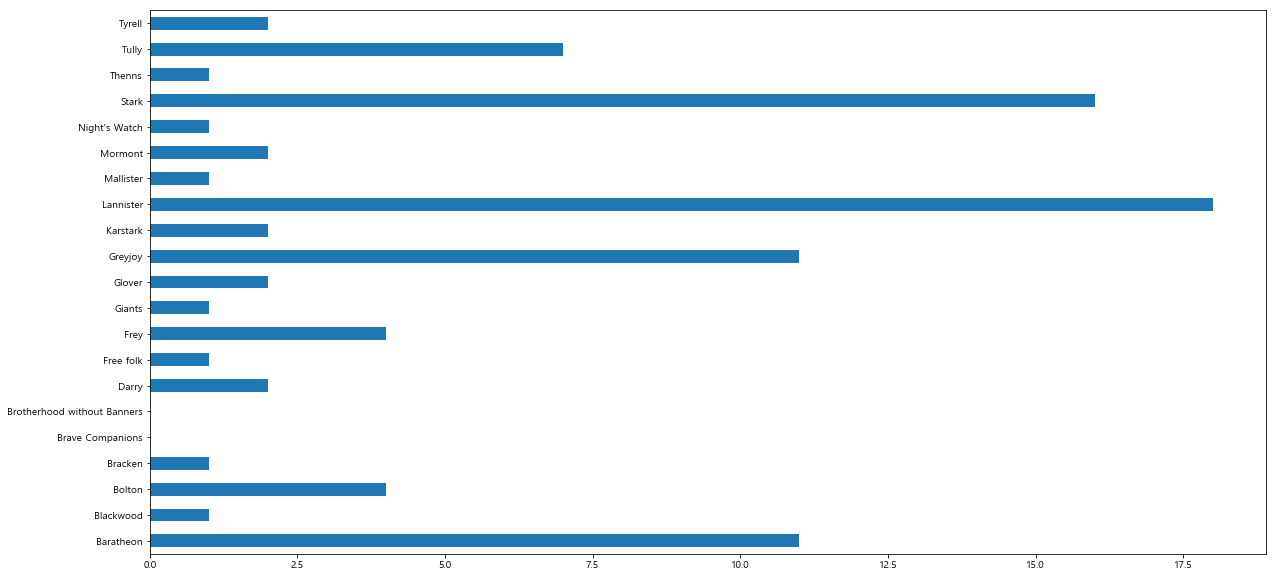

In [59]:
#battle_count.plot(kind = 'barh',figsize = (20,10))

In [115]:
#battles.attacker_1.value_counts()

Stark                          8
Lannister                      8
Greyjoy                        7
Baratheon                      6
Bolton                         2
Frey                           2
Bracken                        1
Darry                          1
Free folk                      1
Brotherhood without Banners    1
Brave Companions               1
Name: attacker_1, dtype: int64

In [ ]:
#for col in house_col:
#    가문별전쟁참가횟수 = 가문별전쟁참가횟수.add(battles[col].value_counts(), fill_value = 0)

### 5) (실습) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [98]:
temp = death[['Name','Death Year']].set_index('Name').dropna()
temp['name'] = temp.index
temp = temp.pivot_table(index = 'Death Year', aggfunc = 'count', values = 'name')
temp.columns = ['# of death']
temp

,# of death
Death Year,
297.0,3
298.0,46
299.0,156
300.0,100


In [96]:
temp2 = battles[['name','year']].pivot_table(index = 'year',aggfunc = 'count',values = 'name')
temp2.columns = ['# of battles']
temp2

,# of battles
year,
298,7
299,20
300,11


In [116]:
data = pd.concat([temp,temp2],axis = 1).fillna(0)
data = data.sort_index()
data

,# of death,# of battles
297.0,3,0.0
298.0,46,7.0
299.0,156,20.0
300.0,100,11.0


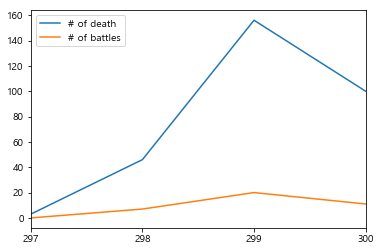

In [119]:
data.plot(xticks = data.index)